# Multi-Class Classification of Supercar Logos using a Convolutional Neural Network - CNN
https://www.kaggle.com/datasets/rafsunahmad/supercars-logo-classifier?resource=download)


## Import Libraries

In [161]:
#!pip install opencv-python

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Aux_ Import Data Set Functions 

In [163]:
import re
def y_extract_brand_name(input_string):
    # Define a regular expression pattern to extract the brand name
    pattern = re.compile(r'Original (.+?) logo')
    # Use the pattern to find a match in the input string
    match = re.search(pattern, input_string)
    # If a match is found, return the extracted brand name; otherwise, return None
    return match.group(1) if match else None

## Import Dataset

In [164]:
import os
from PIL import Image

# Specify the root directory containing folders with images
root_directory = r'\01 _ DL Project\logo finder'

In [165]:
# Initialize empty lists to store images and corresponding labels
X = []
y = []

# Loop through each folder in the root directory
for folder_name in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder_name)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Get the label from the folder name
        label = y_extract_brand_name(folder_name)

        # Loop through each image in the folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)

            # Open the image using PIL
            try:
                img = Image.open(image_path)
            except Exception as e:
                print(f"Error opening image {image_path}: {e}")
                continue

            # Convert image to numpy array or any other image processing steps
            img_array = np.array(img)

            # Append image and label to the lists
            X.append(img_array)
            y.append(label)

## Check Unbalanced Data 

In [166]:
print(pd.DataFrame(y).value_counts())
print(f'\nThis Dataset have {pd.DataFrame(y).count()[0]} labels')

Aston Martin         30
Audi                 30
Bentley              30
Bugatti              30
Fisker Automotive    30
Ford                 30
Koenigsegg           30
Lamborghini          30
Lotus Cars           30
McLaren              30
Mercedes-AMG         30
Pagani               30
Porsche              30
Maserati             28
Ferrari              27
dtype: int64

This Dataset have 445 labels


## Aux_ Re-Shape DataFrame

In [167]:
for _ in range(0, 445,30):
    str(print(y[_])) + str(print(X[_].shape))

Aston Martin
(500, 500, 3)
Audi 
(543, 860, 4)
Bentley
(566, 1000, 3)
Bugatti
(919, 1500, 3)
Ferrari
(1228, 944, 3)
Fisker Automotive
(530, 770, 3)
Ford 
(3024, 4032, 3)
Koenigsegg
(500, 500, 4)
Lamborghini
(2160, 3840)
Lotus Cars
(707, 707, 3)
Maserati
(2001, 3000, 3)
McLaren
(180, 300, 3)
Mercedes-AMG 
(585, 585, 3)
Pagani
(281, 500, 3)
Porsche
(1280, 1024, 3)


In [168]:
no_channels = []

for index, element in enumerate(X):
    X_channels = element.shape[-1]
    X_shape = element.shape
    no_channels.append((X_shape,X_channels,y[index]))

# Creating a DataFrame with custom column names
df_verify_channels = pd.DataFrame(no_channels, columns=[ 'Shape','Channels', 'Label'])

In [169]:
df_verify_channels[(df_verify_channels['Channels'] < 3) | (df_verify_channels['Channels'] > 4)]

Shape  Channels              Label
1       (2160, 3840)      3840       Aston Martin
4       (2160, 3840)      3840       Aston Martin
9         (267, 640)       640       Aston Martin
20      (2160, 3840)      3840       Aston Martin
22      (2160, 3840)      3840       Aston Martin
40        (283, 640)       640              Audi 
56      (1783, 4880)      4880              Audi 
68        (432, 768)       768            Bentley
74         (49, 160)       160            Bentley
77         (37, 120)       120            Bentley
83        (207, 300)       300            Bentley
85        (600, 800)       800            Bentley
86      (1200, 1200)      1200            Bentley
92        (300, 150)       150            Bugatti
93     (800, 800, 2)         2            Bugatti
101     (2160, 3840)      3840            Bugatti
136   (711, 2000, 2)         2            Ferrari
137      (600, 1023)      1023            Ferrari
154       (696, 920)       920  Fisker Automotive
172     (1688, 3000)      3000  Fisker Automotive
177     (2160, 3840)      3840              Ford 
191  (1220, 1536, 2)         2              Ford 
195      (600, 1024)      1024              Ford 
198  (1626, 2048, 2)         2              Ford 
202     (1000, 1000)      1000              Ford 
211        (65, 282)       282         Koenigsegg
229     (1516, 3840)      3840         Koenigsegg
232     (2160, 3840)      3840         Koenigsegg
240     (2160, 3840)      3840        Lamborghini
246     (2160, 3840)      3840        Lamborghini
253       (509, 890)       890        Lamborghini
256        (100, 84)        84        Lamborghini
261     (2160, 3840)      3840        Lamborghini
263     (2160, 3840)      3840        Lamborghini
275       (200, 200)       200         Lotus Cars
277     (2160, 3840)      3840         Lotus Cars
278     (1350, 1800)      1800         Lotus Cars
291       (500, 900)       900         Lotus Cars
313     (2160, 3840)      3840           Maserati
318     (2160, 3840)      3840           Maserati
332       (118, 655)       655            McLaren
355     (1280, 1280)      1280      Mercedes-AMG 
361  (1262, 1252, 2)         2      Mercedes-AMG 
383     (2160, 3840)      3840      Mercedes-AMG 
384      (236, 1440)      1440      Mercedes-AMG 
388     (2000, 3000)      3000             Pagani
404       (390, 390)       390             Pagani
408       (293, 293)       293             Pagani
415     (2160, 3840)      3840            Porsche
434     (2160, 3840)      3840            Porsche
437     (2160, 3840)      3840            Porsche
439     (2160, 3840)      3840            Porsche
441     (2160, 3840)      3840            Porsche
444     (2160, 3840)      3840            Porsche

#### Convert 2 Channel Images into RGB | 3 Channels

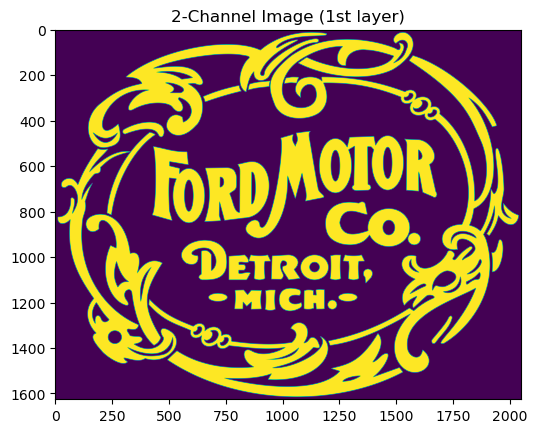

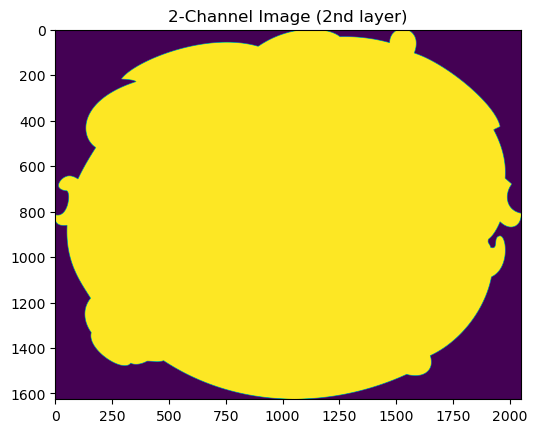

In [170]:
# Display the 2-channel image using plt.imshow with a custom colormap
plt.imshow(X[198][:, :, 0])  # Assuming the first channel represents intensity
plt.title("2-Channel Image (1st layer)")
plt.show()

# Display the 2-channel image using plt.imshow with a custom colormap
plt.imshow(X[198][:, :, 1])  # Assuming the first channel represents intensity
plt.title("2-Channel Image (2nd layer)")
plt.show()

In [171]:
def convert_rgb_2(array):
    # Extract the two channels
    channel1 = array[:, :, 0]
    channel2 = array[:, :, 1]

    # Create a 3-channel image by duplicating information from both channels
    rgb2_array = np.stack([channel1, channel2, channel1], axis=-1)
    return rgb2_array

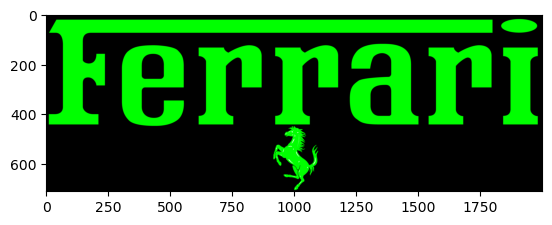

In [172]:
plt.imshow(convert_rgb_2(X[136]))

#### Convert 4 Channel Images into RGB | 3 Channels

In [173]:
df_verify_channels[(df_verify_channels['Channels'] ==4)].head(3)

Shape  Channels         Label
12  (3000, 6000, 4)         4  Aston Martin
13    (394, 700, 4)         4  Aston Martin
23  (1115, 1290, 4)         4  Aston Martin

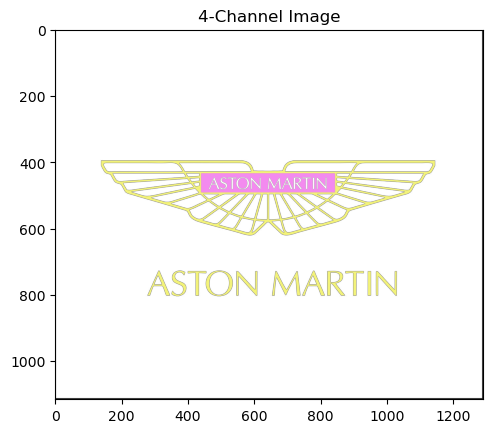

In [174]:
plt.imshow(X[23]) 
plt.title("4-Channel Image")
plt.show()

In [175]:
(X[12][:, :, :3]).shape

(3000, 6000, 3)

In [176]:
def convert_rgb_4(array):
    # Remove the 4th channels
    return array[:, :, :3]

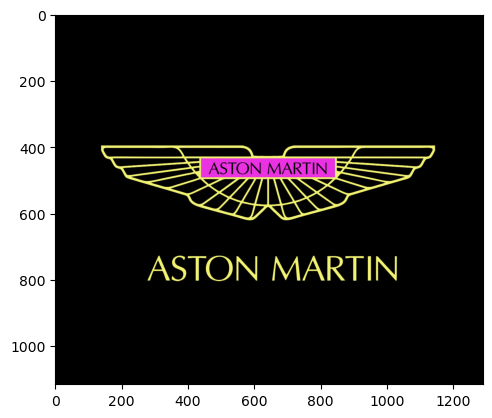

In [177]:
plt.imshow(convert_rgb_4(X[23]))

#### Convert 1 Channel Images into RGB | 3 Channels

In [178]:
df_verify_channels[(df_verify_channels['Channels'] >4)].head(3)

Shape  Channels         Label
1  (2160, 3840)      3840  Aston Martin
4  (2160, 3840)      3840  Aston Martin
9    (267, 640)       640  Aston Martin

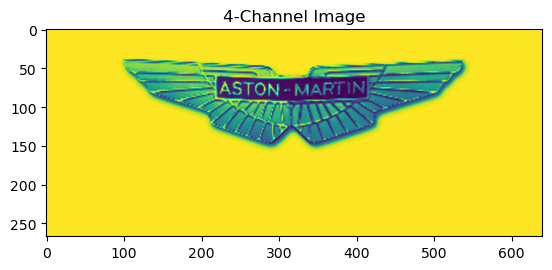

In [179]:
plt.imshow(X[9]) 
plt.title("4-Channel Image")
plt.show()

In [180]:
def convert_rgb_1(array):
    # Create a 3-channel image by duplicating information from both channels
    rgb1_array = np.stack([array, array, array], axis=-1)
    return rgb1_array

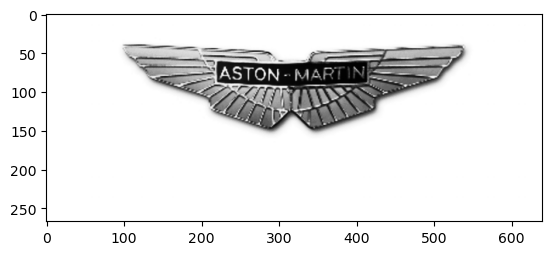

In [181]:
plt.imshow(convert_rgb_1(X[9]))

____________

### Aux_ Functions for Convert Channels:

In [182]:
def X_reshape(dataframe):
    reshaped_arrays = []
    
    for array_index in range(len(dataframe)): 
        if len(dataframe[array_index].shape) == 2:
            reshaped_arrays.append(convert_rgb_1(dataframe[array_index]))
        
        elif len(dataframe[array_index].shape) == 3:
            if dataframe[array_index].shape[2] == 4:
                reshaped_arrays.append(convert_rgb_4(dataframe[array_index]))
            elif dataframe[array_index].shape[2] == 2:
                reshaped_arrays.append(convert_rgb_2(dataframe[array_index]))
            elif dataframe[array_index].shape[2] == 3:
                reshaped_arrays.append(dataframe[array_index])

    if len(dataframe) != len(reshaped_arrays):
        return print('ERROR, check the function!')
                
    return reshaped_arrays

### Aux_ Function for Pixelization Normalization

In [183]:
import cv2
def X_resize(array, target_size):
    resized_images = []
    for img in array:
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_NEAREST)
        resized_images.append(resized_img)
        
    return np.array(resized_images)


## Re-Shape Dataset

In [184]:
# ReShape Channels : 
X=X_reshape(X)

In [185]:
# ReShape Pixel Size :
target_size = (530, 300)  # Dimensions of the picture

X = X_resize(X, target_size)

In [186]:
X[10].shape


(300, 530, 3)

In [187]:
len(X)

445

## Data Viz

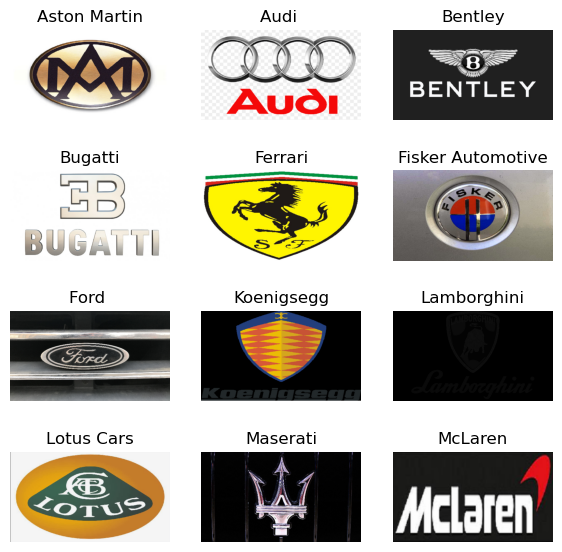

In [188]:
plt.figure(figsize=(7, 7))

for zz,_ in enumerate(range(0, 360,30)):
    plt.subplot(4, 3, zz + 1)
    plt.title(y[_])
    plt.imshow(X[_])
    plt.axis('off')
    
plt.show()

## Normalization

In [189]:
#X.max() // 255 was the biggest pixel value , 
#which means that we haven't anything anormal, so we can apply the normalization without any problems :

X=X/255

## Train-Test-Validation Split

In [190]:
y=np.array(y)

In [191]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [192]:
#Validation split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [193]:
# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_validation shape:", X_validation.shape)

X_train shape: (320, 300, 530, 3)
X_test shape: (89, 300, 530, 3)
X_validation shape: (36, 300, 530, 3)


_____________
VERIFYING THE SPLIT :

In [194]:
print(f'TRAIN LABELS : \n{pd.DataFrame(y_train).value_counts()}')
print(f'\nTEST LABELS : \n{pd.DataFrame(y_test).value_counts()}')
print(f'\nVALIDATION LABELS : \n{pd.DataFrame(y_validation).value_counts()}')

TRAIN LABELS : 
Aston Martin         22
Bentley              22
Ford                 22
Lotus Cars           22
McLaren              22
Pagani               22
Porsche              22
Audi                 21
Bugatti              21
Fisker Automotive    21
Koenigsegg           21
Lamborghini          21
Mercedes-AMG         21
Ferrari              20
Maserati             20
dtype: int64

TEST LABELS : 
Aston Martin         6
Audi                 6
Bentley              6
Bugatti              6
Fisker Automotive    6
Ford                 6
Koenigsegg           6
Lamborghini          6
Lotus Cars           6
Maserati             6
McLaren              6
Mercedes-AMG         6
Pagani               6
Porsche              6
Ferrari              5
dtype: int64

VALIDATION LABELS : 
Audi                 3
Bugatti              3
Fisker Automotive    3
Koenigsegg           3
Lamborghini          3
Mercedes-AMG         3
Aston Martin         2
Bentley              2
Ferrari              2
Ford    

_______

# CNN _ FINAL _ MELHORES RESULTADOS 

In [250]:
# Assuming a Variable on the Output , to be able to train with more brands.
MultiClassClassification_no = pd.DataFrame(y).value_counts().count()

In [251]:
# Assuming a Variable for the input_shape , to be able to train if we want to change the pixel size of each picture.
shape_to_model = X_train.shape[1:4]

## CNN Architecture

In [252]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers

# Define the CNN model
model = models.Sequential()

# Convolutional layers with L1 or L2 regularization
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=shape_to_model))
model.add(layers.MaxPooling2D((2 ,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (2, 2), activation='relu')) #Try to see text
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128,(2, 2), activation='relu')) #Try to see text
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Flatten layer
model.add(layers.Flatten())

# Dense layers
#model.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005))) #,kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)
#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.1))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='relu' )) #,kernel_regularizer=regularizers.l1_l2(l1=0.005, l2=0.005)
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
          
#OUTPUT LAYER
model.add(layers.Dense(MultiClassClassification_no, activation='softmax'))  # Assuming a Variable on the Output , to be able to train with more brands.

In [253]:
#model.build()

In [254]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 296, 526, 64)      4864      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 148, 263, 64)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_32 (Ba  (None, 148, 263, 64)      256       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 262, 128)     32896     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 49, 87, 128)       0         
 ng2D)                                                           
                                                      

## Label Encoding

In [255]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_validation_encoded = label_encoder.transform(y_validation)

## Compile & Optimization
- Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

In [256]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.005)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Data Augmentation

In [257]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotation in degrees
    width_shift_range=0.15,  # Horizontal shift
    height_shift_range=0.15, # Vertical shift
    shear_range=0.1,        # Shearing
    #zoom_range=0.2,        # Zooming
    fill_mode='nearest'     # How to fill in newly created pixels
)

# Create a new instance of the ImageDataGenerator without augmentation for validation
validation_datagen = ImageDataGenerator()

# Fit the generator on your data
datagen.fit(X_train)

## Fit the Model

In [258]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
#model.load_weights("versao_final_c64_128_128_d512_64_128.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=32,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 3.8795 - accuracy: 0.1125
Epoch 1: val_accuracy improved from -inf to 0.05556, saving model to versao_final_c64_128_128_d256_512.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 45s 4s/step - loss: 3.8795 - accuracy: 0.1125 - val_loss: 54.6875 - val_accuracy: 0.0556
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 3.0841 - accuracy: 0.1688
Epoch 2: val_accuracy did not improve from 0.05556
10/10 [==============================] - 34s 3s/step - loss: 3.0841 - accuracy: 0.1688 - val_loss: 71.3014 - val_accuracy: 0.0278
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 2.7589 - accuracy: 0.2000
Epoch 3: val_accuracy improved from 0.05556 to 0.08333, saving model to versao_final_c64_128_128_d256_512.h5
10/10 [==============================] - 34s 3s/step - loss: 2.7589 - accuracy: 0.2000 - val_loss: 59.2890 - val_accuracy: 0.0833
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 2.6140 - accuracy: 0.1906
Epoch 4: val_accuracy improved from 0.08333 to 0.11111, saving model to versao_final_c64_128_128_d256_512.h5
10/10 [==============================] - 33s 3s/step - l

## Model Evaluation

In [259]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [260]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 714ms/step - loss: 3.3817 - accuracy: 0.2921

Test accuracy: 0.2921348214149475


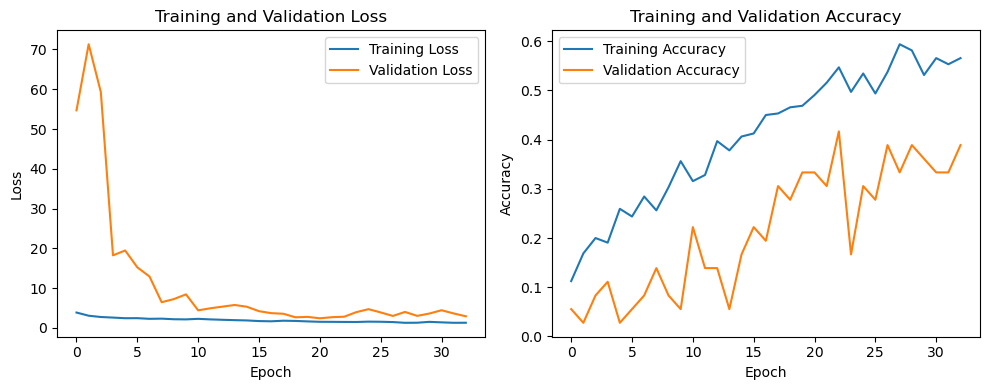

In [261]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction

In [262]:
Predict = model.predict(X_test)

3/3 [==============================] - 2s 672ms/step


In [263]:
# Extract argmax of predictions
predicted_labels = [each_array.argmax() for each_array in Predict]
testing_results = []
# Create a DataFrame
testing_results = pd.DataFrame({
    'Predicted': label_encoder.inverse_transform(predicted_labels),
    'Real': y_test.tolist(),
})

# Add Verify : 
testing_results['Validation'] = testing_results['Predicted']==testing_results['Real']

In [264]:
print(f"Corrects -- {testing_results[testing_results['Validation']==True].value_counts().sum()}: \n{testing_results[testing_results['Validation']==True].value_counts()}\n")
print(f"Wrongs -- {testing_results[testing_results['Validation']==False].value_counts().sum()} : \n{testing_results[testing_results['Validation']==False].value_counts()}\n")

Corrects -- 26: 
Predicted          Real               Validation
Ford               Ford               True          4
Bentley            Bentley            True          3
Audi               Audi               True          2
Bugatti            Bugatti            True          2
Ferrari            Ferrari            True          2
Fisker Automotive  Fisker Automotive  True          2
Koenigsegg         Koenigsegg         True          2
Lotus Cars         Lotus Cars         True          2
McLaren            McLaren            True          2
Aston Martin       Aston Martin       True          1
Lamborghini        Lamborghini        True          1
Maserati           Maserati           True          1
Mercedes-AMG       Mercedes-AMG       True          1
Pagani             Pagani             True          1
dtype: int64

Wrongs -- 63 : 
Predicted          Real               Validation
Ferrari            Porsche            False         5
McLaren            Mercedes-AMG       False  

In [265]:
testing_results['Validation'].value_counts()

False    63
True     26
Name: Validation, dtype: int64

In [266]:
print('On which logos do we have more errors: \n')
print(testing_results[testing_results['Validation']==False]['Real'].value_counts())

On which logos do we have more errors: 

Porsche              6
Lamborghini          5
Mercedes-AMG         5
Aston Martin         5
Maserati             5
Pagani               5
Lotus Cars           4
Audi                 4
Fisker Automotive    4
Bugatti              4
Koenigsegg           4
McLaren              4
Ferrari              3
Bentley              3
Ford                 2
Name: Real, dtype: int64


In [267]:
print('On which logos do we have more accertiveness : \n')
print(testing_results[testing_results['Validation']==True]['Real'].value_counts())

On which logos do we have more accertiveness : 

Ford                 4
Bentley              3
Fisker Automotive    2
McLaren              2
Bugatti              2
Ferrari              2
Audi                 2
Lotus Cars           2
Koenigsegg           2
Maserati             1
Pagani               1
Mercedes-AMG         1
Lamborghini          1
Aston Martin         1
Name: Real, dtype: int64


## Re-Tuning and Optimization

### Changes at Learning Rate

In [276]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.01)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [278]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_2 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=32,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 4.1380 - accuracy: 0.2000
Epoch 1: val_accuracy improved from -inf to 0.02778, saving model to versao_final_c64_128_128_d256_512.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 37s 3s/step - loss: 4.1380 - accuracy: 0.2000 - val_loss: 86.5916 - val_accuracy: 0.0278
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 3.0665 - accuracy: 0.1719
Epoch 2: val_accuracy improved from 0.02778 to 0.08333, saving model to versao_final_c64_128_128_d256_512.h5
10/10 [==============================] - 34s 3s/step - loss: 3.0665 - accuracy: 0.1719 - val_loss: 162.6806 - val_accuracy: 0.0833
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 2.6324 - accuracy: 0.2812
Epoch 3: val_accuracy did not improve from 0.08333
10/10 [==============================] - 33s 3s/step - loss: 2.6324 - accuracy: 0.2812 - val_loss: 65.5545 - val_accuracy: 0.0833
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 2.2332 - accuracy: 0.3125
Epoch 4: val_accuracy improved from 0.08333 to 0.13889, saving model to versao_final_c64_128_128_d256_512.h5
10/10 [==============================] - 36s 4s/step - 

### Model Evaluation

In [279]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [280]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 555ms/step - loss: 5.3437 - accuracy: 0.2809

Test accuracy: 0.2808988690376282


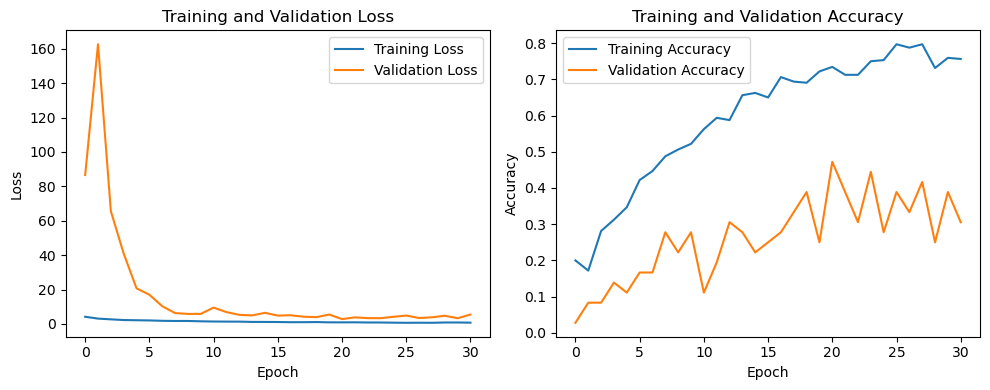

In [282]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_2.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_2.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Re-Tuning and Optimization | 2

### Changes at Learning Rate

In [283]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.001)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [284]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512_v3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_3 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=64,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 0.7596 - accuracy: 0.7344
Epoch 1: val_accuracy improved from -inf to 0.47222, saving model to versao_final_c64_128_128_d256_512_v3.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 35s 3s/step - loss: 0.7596 - accuracy: 0.7344 - val_loss: 2.7955 - val_accuracy: 0.4722
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.7750
Epoch 2: val_accuracy improved from 0.47222 to 0.50000, saving model to versao_final_c64_128_128_d256_512_v3.h5
10/10 [==============================] - 30s 3s/step - loss: 0.6491 - accuracy: 0.7750 - val_loss: 2.7935 - val_accuracy: 0.5000
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.8281
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 29s 3s/step - loss: 0.5529 - accuracy: 0.8281 - val_loss: 2.6315 - val_accuracy: 0.4722
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 0.4973 - accuracy: 0.8406
Epoch 4: val_accuracy did not improve from 0.50000
10/10 [==============================] - 30s 3s/step - loss: 0.4973 - accuracy: 0.8406 - val_loss: 2.5359 - val_ac

### Model Evaluation

In [286]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [287]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 549ms/step - loss: 2.4273 - accuracy: 0.4270

Test accuracy: 0.42696627974510193


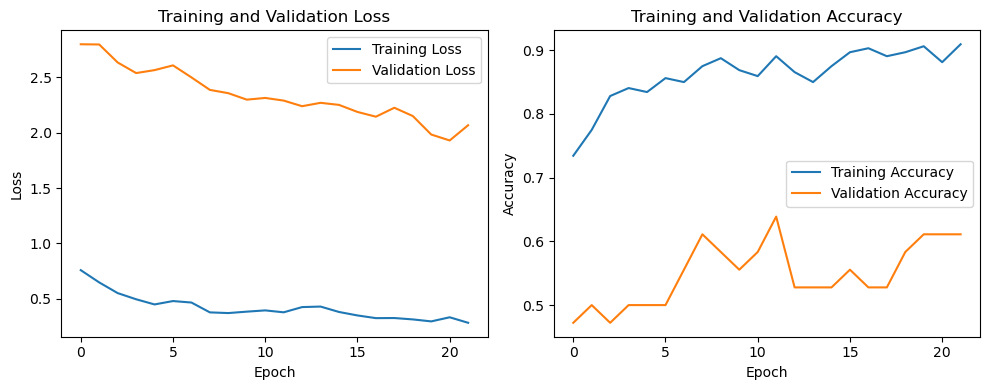

In [295]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_3.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_3.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Re-Tuning and Optimization | 3

### Changes at Learning Rate

In [296]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.001)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [297]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512_v3.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512_v4.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_4 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=256,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 0.4519 - accuracy: 0.8500
Epoch 1: val_accuracy improved from -inf to 0.55556, saving model to versao_final_c64_128_128_d256_512_v4.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 33s 3s/step - loss: 0.4519 - accuracy: 0.8500 - val_loss: 2.4062 - val_accuracy: 0.5556
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 0.3250 - accuracy: 0.8969
Epoch 2: val_accuracy did not improve from 0.55556
10/10 [==============================] - 29s 3s/step - loss: 0.3250 - accuracy: 0.8969 - val_loss: 2.2762 - val_accuracy: 0.5000
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8375
Epoch 3: val_accuracy did not improve from 0.55556
10/10 [==============================] - 32s 3s/step - loss: 0.4214 - accuracy: 0.8375 - val_loss: 2.2805 - val_accuracy: 0.4722
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8656
Epoch 4: val_accuracy did not improve from 0.55556
10/10 [==============================] - 33s 3s/step - loss: 0.3926 - accuracy: 0.8656 - val_loss: 2.1370 - val_accuracy: 0.5556
Epoch 5/200
10/10 [===========================

### Model Evaluation

In [301]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [302]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 522ms/step - loss: 2.6573 - accuracy: 0.4719

Test accuracy: 0.47191011905670166


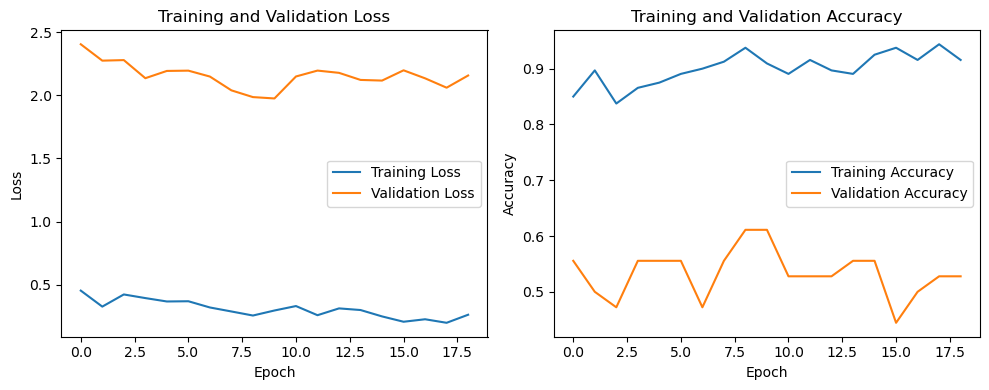

In [303]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_4.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_4.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Re-Tuning and Optimization | 4
We see that if the batch gets bigger the accuracy gets better on the test, maybe because the model will gets better to generalyze the data , so we will adjust once more the batch size 

### Changes at Learning Rate

In [304]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.003)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [305]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512_v4.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512_v5.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_5 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=512,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 0.5089 - accuracy: 0.8469
Epoch 1: val_accuracy improved from -inf to 0.38889, saving model to versao_final_c64_128_128_d256_512_v5.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 31s 3s/step - loss: 0.5089 - accuracy: 0.8469 - val_loss: 2.5807 - val_accuracy: 0.3889
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 0.4500 - accuracy: 0.8625
Epoch 2: val_accuracy improved from 0.38889 to 0.47222, saving model to versao_final_c64_128_128_d256_512_v5.h5
10/10 [==============================] - 30s 3s/step - loss: 0.4500 - accuracy: 0.8625 - val_loss: 2.5836 - val_accuracy: 0.4722
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8719
Epoch 3: val_accuracy did not improve from 0.47222
10/10 [==============================] - 29s 3s/step - loss: 0.3737 - accuracy: 0.8719 - val_loss: 2.6164 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.8594
Epoch 4: val_accuracy did not improve from 0.47222
10/10 [==============================] - 30s 3s/step - loss: 0.4133 - accuracy: 0.8594 - val_loss: 2.4966 - val_ac

### Model Evaluation

In [306]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [307]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 687ms/step - loss: 3.3196 - accuracy: 0.4157

Test accuracy: 0.4157303273677826


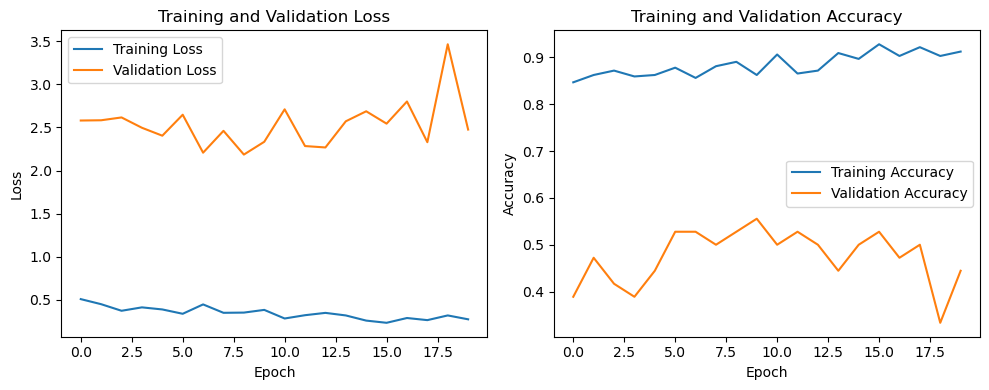

In [308]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_5.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_5.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Re-Tuning and Optimization | 5
Let's test now with a smaller batch to test my assumption

### Changes at Learning Rate

In [309]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.003)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [310]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512_v4.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512_v6.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_6 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=8,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 0.4540 - accuracy: 0.8625
Epoch 1: val_accuracy improved from -inf to 0.38889, saving model to versao_final_c64_128_128_d256_512_v6.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 32s 3s/step - loss: 0.4540 - accuracy: 0.8625 - val_loss: 2.6310 - val_accuracy: 0.3889
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 0.5025 - accuracy: 0.8531
Epoch 2: val_accuracy improved from 0.38889 to 0.47222, saving model to versao_final_c64_128_128_d256_512_v6.h5
10/10 [==============================] - 30s 3s/step - loss: 0.5025 - accuracy: 0.8531 - val_loss: 2.4879 - val_accuracy: 0.4722
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 0.4324 - accuracy: 0.8531
Epoch 3: val_accuracy improved from 0.47222 to 0.50000, saving model to versao_final_c64_128_128_d256_512_v6.h5
10/10 [==============================] - 31s 3s/step - loss: 0.4324 - accuracy: 0.8531 - val_loss: 2.3187 - val_accuracy: 0.5000
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8531
Epoch 4: val_accuracy did not improve from 0.50000
10/10 [==============================] - 31s 3s/step 

### Model Evaluation

In [311]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [312]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 784ms/step - loss: 3.1753 - accuracy: 0.3933

Test accuracy: 0.3932584226131439


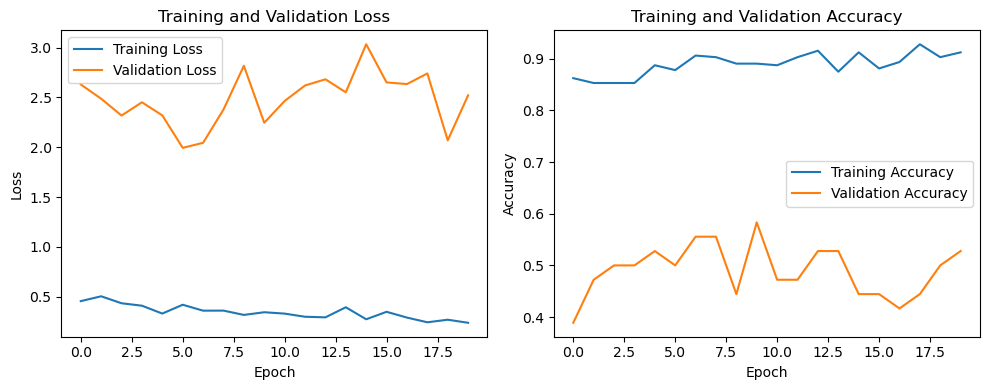

In [313]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_6.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_6.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Re-Tuning and Optimization | 6
Saw that bigger batch did improve the results , so , let's try with a lower learning rate and even a bigger batch size 

### Changes at Learning Rate

In [319]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.003)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [320]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512_v4.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512_v7.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_7 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=200,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=1024,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/200
10/10 [==============================] - ETA: 0s - loss: 0.5371 - accuracy: 0.8250
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to versao_final_c64_128_128_d256_512_v7.h5


C:\Users\ptcramorim\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 34s 3s/step - loss: 0.5371 - accuracy: 0.8250 - val_loss: 2.5508 - val_accuracy: 0.5000
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.8375
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 31s 3s/step - loss: 0.4832 - accuracy: 0.8375 - val_loss: 2.9717 - val_accuracy: 0.3333
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.8469
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 34s 3s/step - loss: 0.4224 - accuracy: 0.8469 - val_loss: 2.8438 - val_accuracy: 0.4167
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 0.4602 - accuracy: 0.8344
Epoch 4: val_accuracy did not improve from 0.50000
10/10 [==============================] - 35s 3s/step - loss: 0.4602 - accuracy: 0.8344 - val_loss: 2.4083 - val_accuracy: 0.5000
Epoch 5/200
10/10 [===========================

### Model Evaluation

In [321]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [322]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 685ms/step - loss: 2.9393 - accuracy: 0.3933

Test accuracy: 0.3932584226131439


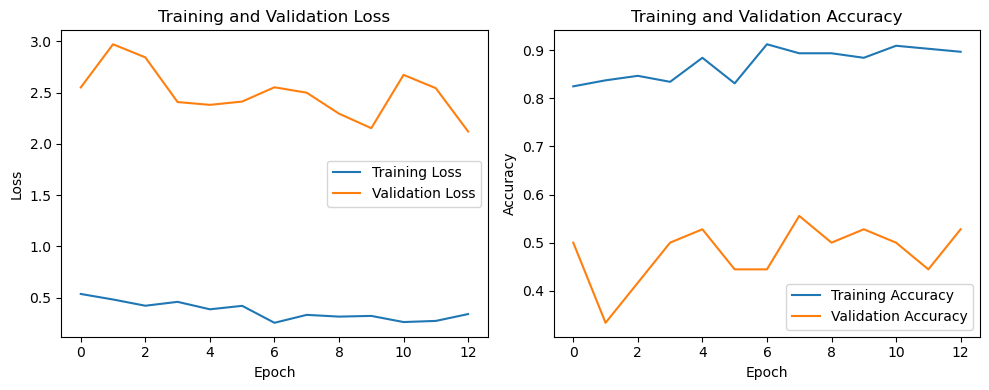

In [323]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_7.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_7.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_7.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Re-Tuning and Optimization | FINAL VERSION  :
Taking the V4 version to behiond , because in the end it's the version that had been saved with the validation loss lower than the other 

### Changes at Learning Rate

In [324]:
from keras.optimizers import Adam

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.001)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the Model with Pre-Trained Weights

In [334]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Load the best model weights from the checkpoint
model.load_weights("versao_final_c64_128_128_d256_512_v4.h5")

# Define callback for saving the best model
checkpoint_callback = ModelCheckpoint("versao_final_c64_128_128_d256_512_v8.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define callback for early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max')

# Train the model using the augmented data
model_cnn_augmented_8 = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=10,
    validation_data=validation_datagen.flow(X_validation, y_validation_encoded, batch_size=2),
    verbose=1,
    batch_size=256,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.8938
Epoch 1: val_accuracy improved from -inf to 0.47222, saving model to versao_final_c64_128_128_d256_512_v8.h5
10/10 [==============================] - 38s 4s/step - loss: 0.2859 - accuracy: 0.8938 - val_loss: 2.3348 - val_accuracy: 0.4722
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8781
Epoch 2: val_accuracy improved from 0.47222 to 0.50000, saving model to versao_final_c64_128_128_d256_512_v8.h5
10/10 [==============================] - 36s 4s/step - loss: 0.3610 - accuracy: 0.8781 - val_loss: 2.2721 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.8813
Epoch 3: val_accuracy improved from 0.50000 to 0.58333, saving model to versao_final_c64_128_128_d256_512_v8.h5
10/10 [==============================] - 37s 4s/step - loss: 0.3565 - accuracy: 0.8813 - val_loss: 2.0189 - val_accuracy: 0.583

### Model Evaluation

In [335]:
# Assuming you already have a fitted label_encoder from the training set
y_test_encoded = label_encoder.transform(y_test)

In [336]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"\nTest accuracy: {test_acc}")

3/3 [==============================] - 2s 597ms/step - loss: 2.7324 - accuracy: 0.4719

Test accuracy: 0.47191011905670166


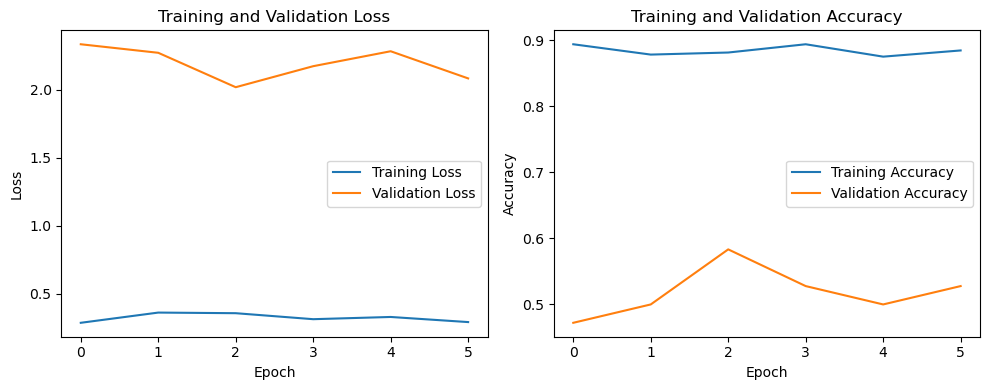

In [337]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model_cnn_augmented_8.history['loss'], label='Training Loss')
plt.plot(model_cnn_augmented_8.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_cnn_augmented_8.history['accuracy'], label='Training Accuracy')
plt.plot(model_cnn_augmented_8.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Prediction

In [338]:
Predict = model.predict(X_test)

3/3 [==============================] - 2s 547ms/step


In [339]:
# Extract argmax of predictions
predicted_labels = [each_array.argmax() for each_array in Predict]
testing_results = []
# Create a DataFrame
testing_results = pd.DataFrame({
    'Predicted': label_encoder.inverse_transform(predicted_labels),
    'Real': y_test.tolist(),
})

# Add Verify : 
testing_results['Validation'] = testing_results['Predicted']==testing_results['Real']

In [340]:
print(f"Corrects -- {testing_results[testing_results['Validation']==True].value_counts().sum()}: \n{testing_results[testing_results['Validation']==True].value_counts()}\n")
print(f"Wrongs -- {testing_results[testing_results['Validation']==False].value_counts().sum()} : \n{testing_results[testing_results['Validation']==False].value_counts()}\n")

Corrects -- 42: 
Predicted          Real               Validation
Pagani             Pagani             True          5
Porsche            Porsche            True          5
Ford               Ford               True          4
Koenigsegg         Koenigsegg         True          4
Maserati           Maserati           True          4
Ferrari            Ferrari            True          3
Fisker Automotive  Fisker Automotive  True          3
Lotus Cars         Lotus Cars         True          3
McLaren            McLaren            True          3
Aston Martin       Aston Martin       True          2
Lamborghini        Lamborghini        True          2
Mercedes-AMG       Mercedes-AMG       True          2
Bentley            Bentley            True          1
Bugatti            Bugatti            True          1
dtype: int64

Wrongs -- 47 : 
Predicted          Real               Validation
Aston Martin       Bentley            False         3
                   Mercedes-AMG       False  

In [341]:
print('On which logos do we have more errors: \n')
print(testing_results[testing_results['Validation']==False]['Real'].value_counts())

On which logos do we have more errors: 

Audi                 6
Bugatti              5
Bentley              5
Lamborghini          4
Mercedes-AMG         4
Aston Martin         4
Lotus Cars           3
McLaren              3
Fisker Automotive    3
Ford                 2
Ferrari              2
Koenigsegg           2
Maserati             2
Porsche              1
Pagani               1
Name: Real, dtype: int64


In [342]:
print('On which logos do we have more accertiveness : \n')
print(testing_results[testing_results['Validation']==True]['Real'].value_counts())

On which logos do we have more accertiveness : 

Pagani               5
Porsche              5
Ford                 4
Maserati             4
Koenigsegg           4
Fisker Automotive    3
Ferrari              3
McLaren              3
Lotus Cars           3
Aston Martin         2
Lamborghini          2
Mercedes-AMG         2
Bentley              1
Bugatti              1
Name: Real, dtype: int64


# Understanding Deeper what is the model doing :

### Data Aumentagtion

In [269]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotation in degrees
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    shear_range=0.1,        # Shearing / Bending the image
    #zoom_range=0.2,        # Zooming
    fill_mode='nearest',    # How to fill in newly created pixels
    
)

# Create a new instance of the ImageDataGenerator without augmentation for validation
validation_datagen = ImageDataGenerator()

# Fit the generator on your data
datagen.fit(X_train)

In [270]:
X_train.shape

(320, 300, 530, 3)

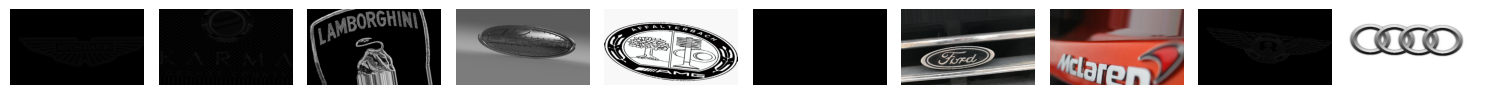

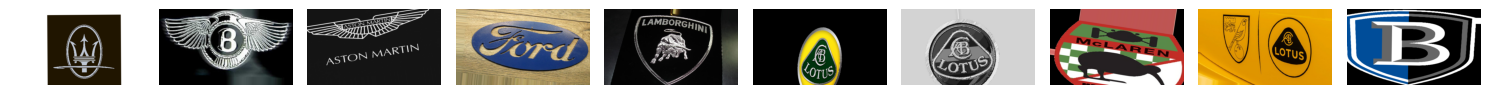

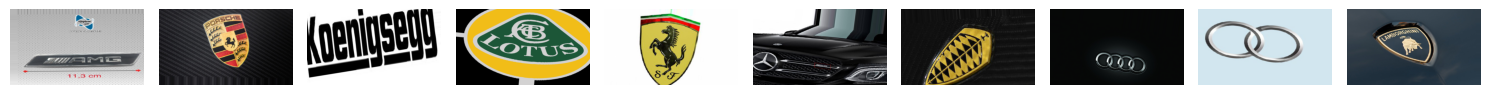

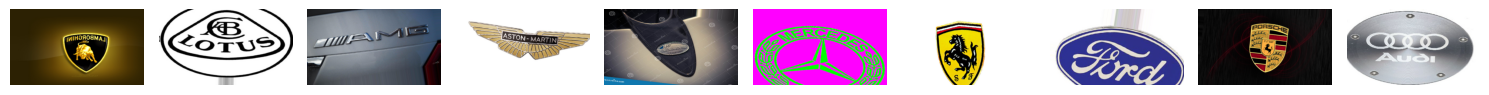

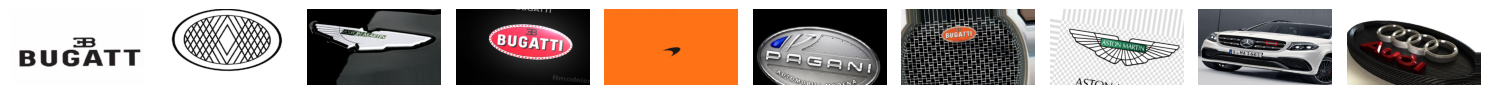

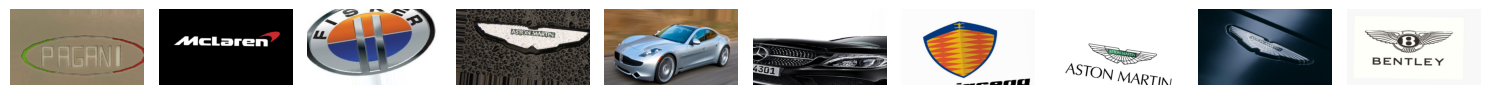

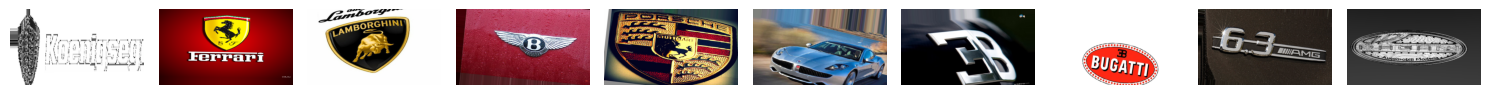

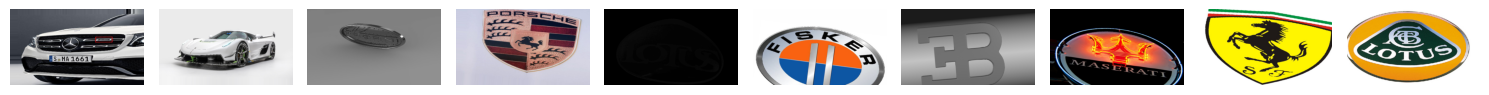

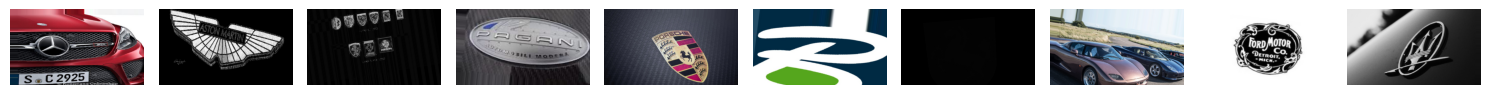

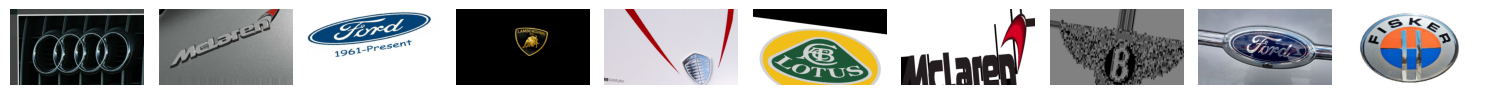

In [271]:
for IG_Batch in range(10):
    plt.figure(figsize=(15,20))
    for Modified_Image in range(10):
        plt.subplot(10 ,10, Modified_Image + 1)
        plt.imshow(datagen.flow(X_train, batch_size=32,seed=0)[IG_Batch][Modified_Image])
        plt.axis('off')
    plt.tight_layout()  # Adjust subplot layout to make them fit 
    plt.show()

Lotus Cars


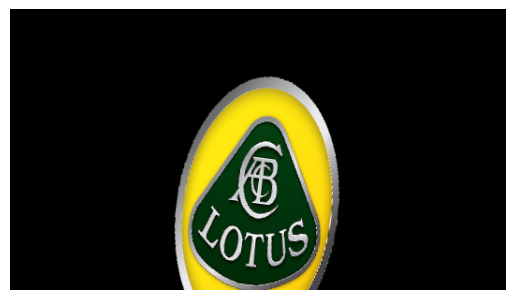

In [272]:
# Checking the labels on the fit 
print(datagen.flow(X_train, y_train, batch_size=32,seed=0)[1][-1][5]) #BATCH_AUMENG // X_TRAIN or LABEL ?  //AUMENG_FIGURE

plt.imshow(datagen.flow(X_train, y_train, batch_size=32,seed=0)[1][0][5])
plt.axis('off')
plt.show()

### Convolution View :

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models

# Function to visualize feature maps
def visualize_feature_maps(model, layer_name, input_image):
    # Extract feature maps
    layer_output = model.get_layer(layer_name).output
    intermediate_model = models.Model(inputs=model.input, outputs=layer_output)
    
    # Assuming input_image contains multiple images in a batch, but we're only interested in the first one
    intermediate_output = intermediate_model.predict(input_image[0:1])
    
    # Plot feature maps
    num_features = intermediate_output.shape[-1]
    plt.tight_layout()
    for i in range(num_features):
        plt.subplot(8, num_features // 8, i + 1)  # Adjust subplot layout as needed
        plt.imshow(intermediate_output[0, :, :, i] )  #cmap='viridis'
        plt.axis('off')
    plt.show()

# Assuming 'shape_to_model' is the shape of your input images
# Assuming 'MultiClassClassification_no' is the number of classes in your classification problem
# Assuming 'input_image' is your input image (e.g., a single image or a batch of images)

conv2d_15
1/1 [==============================] - 0s 53ms/step


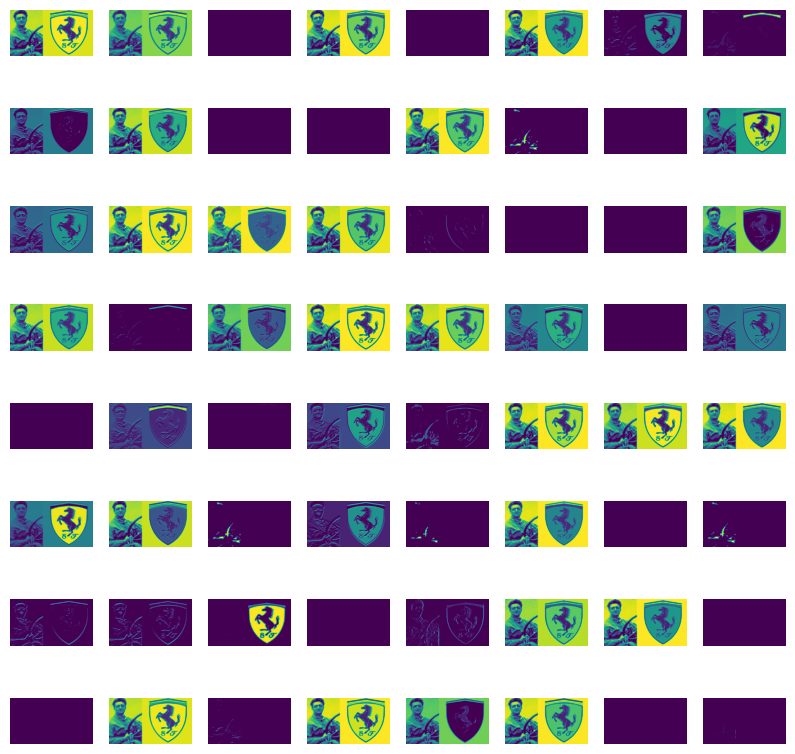

max_pooling2d_15
1/1 [==============================] - 0s 37ms/step


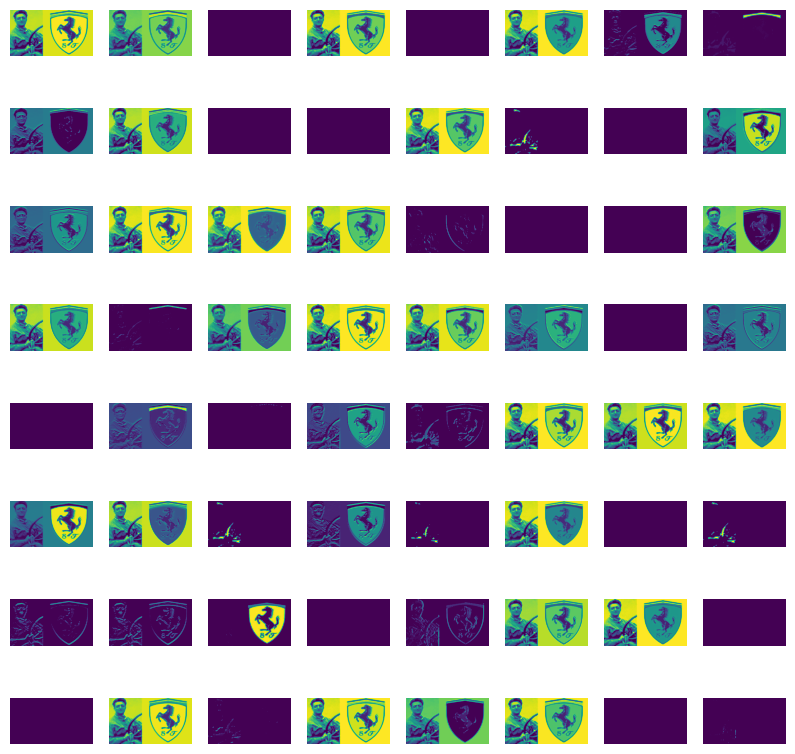

conv2d_16
1/1 [==============================] - 0s 61ms/step


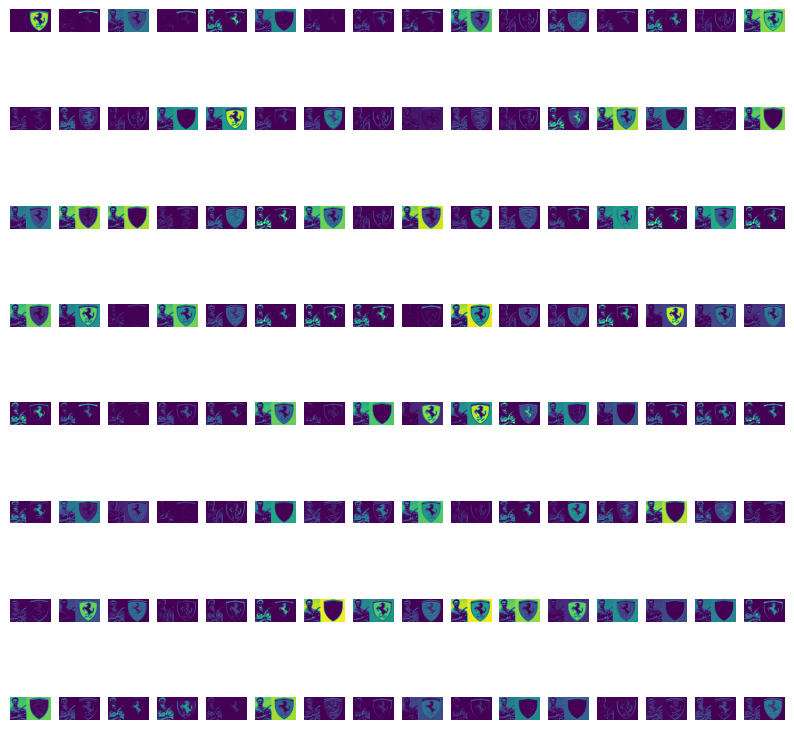

max_pooling2d_16
1/1 [==============================] - 0s 63ms/step


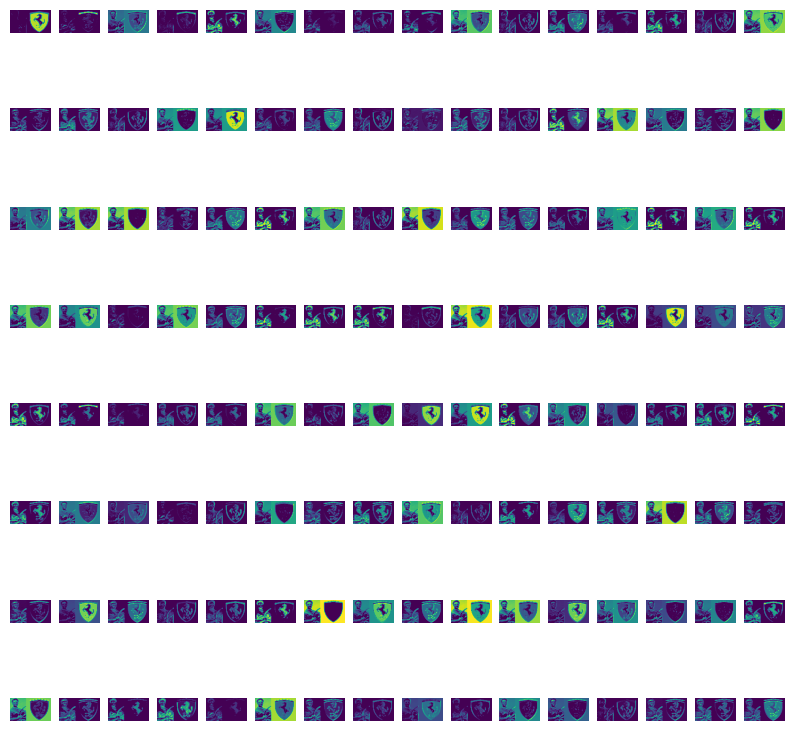

conv2d_17
1/1 [==============================] - 0s 85ms/step


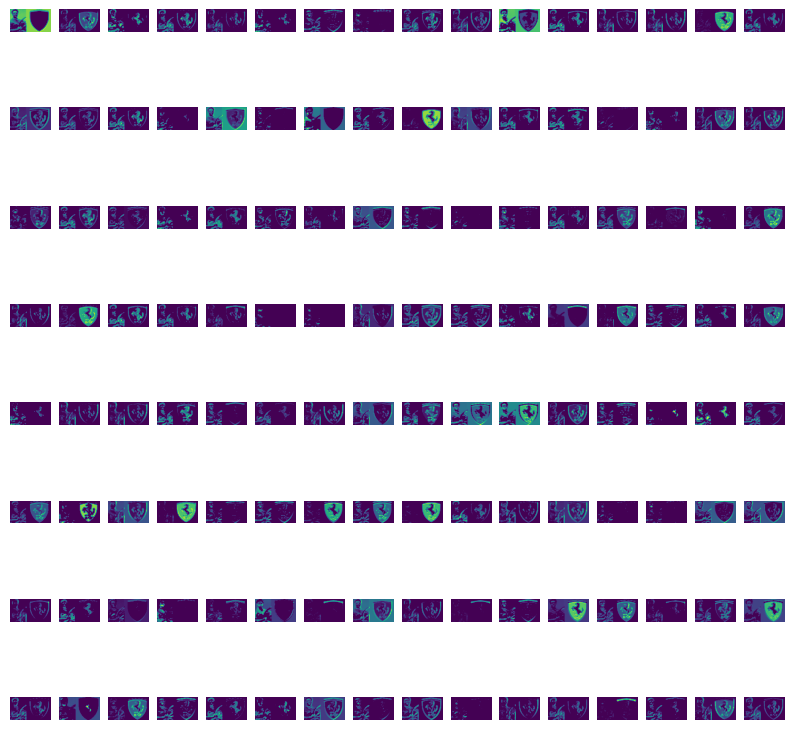

max_pooling2d_17
1/1 [==============================] - 0s 83ms/step


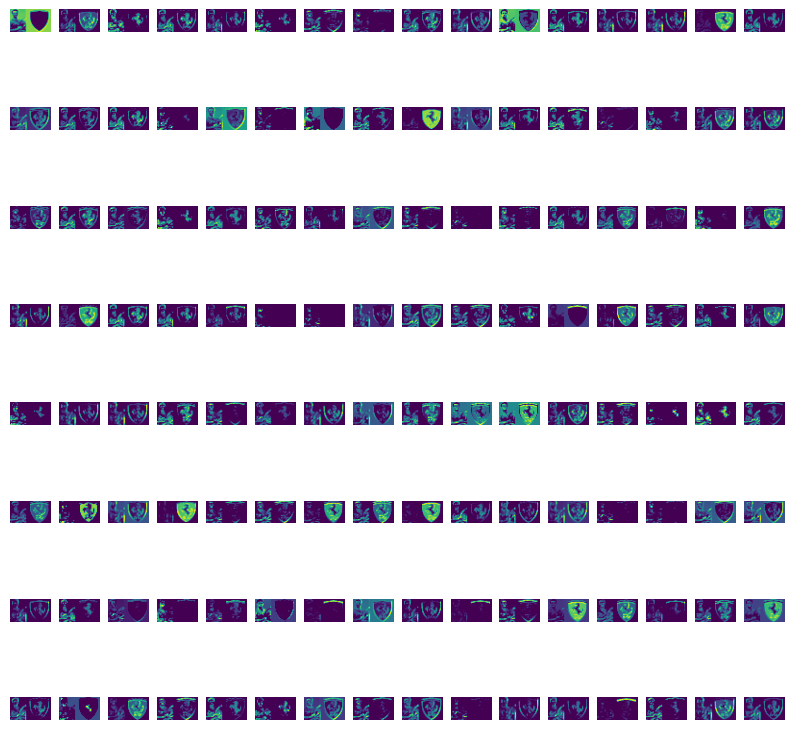

In [332]:

# Create a dummy input image with the correct shape
#input_image = np.zeros((1, shape_to_model[0], shape_to_model[1], shape_to_model[2]))
input_image = np.expand_dims(X_train[22], axis=0)
# Load your trained model
# Replace 'model' with your trained model if not defined already

# Visualize feature maps for each convolutional layer
conv_layer_names = ['conv2d_15','max_pooling2d_15', 'conv2d_16','max_pooling2d_16','conv2d_17','max_pooling2d_17']  # Update with the actual layer names in your model
for layer_name in conv_layer_names:
    print(layer_name)
    plt.figure(figsize=(10,10))
    visualize_feature_maps(model, layer_name, input_image)